**Insight into "Flood" and Numerical Predictor Variables:**

* KDE Plot - Weather Features (Numerical) with respect to "Flood"

* Box Plot - Weather Features (Numerical) with respect to "Flood"

* Bar Plot - Weather Features (Numerical) with respect to "Flood"

**Q-Insight into "Flood" and Categorical Predictor Variables:**
    
* Count Plot - "Flood" and Categorical Predictor Variables   

* Heatmap - "Flood" and Categorical Predictor Variables

* Chi-square Test - "Flood" and Categorical Predictor Variables

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Read the dataset

df= pd.read_csv("divisions daily weather.csv")

In [3]:
df.head()

,cloudcover,conditions,Year,Quarter,Month,Day,DayType,description,dew,Division,...,Month.2,Day.2,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
0,0.0,Clear,2013,Qtr 1,January,1,No rain,Clear conditions throughout the day.,50.9,Sylhet,...,January,1,60.8,73.8,47.4,6,1.6,208.4,NaN,6.0
1,0.0,Clear,2013,Qtr 1,January,2,No rain,Clear conditions throughout the day.,13.6,Chittagong,...,January,2,18.3,24.0,11.9,7,4.2,323.1,NaN,18.4
2,0.0,Clear,2013,Qtr 1,January,2,No rain,Clear conditions throughout the day.,53.0,Sylhet,...,January,2,62.9,75.6,50.8,7,1.9,203.8,NaN,7.2
3,0.0,Clear,2013,Qtr 1,January,3,No rain,Clear conditions throughout the day.,42.0,Naryanganj,...,January,3,60.9,78.9,48.5,7,2.5,10.2,NaN,9.8
4,0.0,Clear,2013,Qtr 1,January,4,No rain,Clear conditions throughout the day.,36.3,Naryanganj,...,January,4,60.1,81.8,46.3,7,2.5,12.7,NaN,8.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloudcover        30000 non-null  float64
 1   conditions        30000 non-null  object 
 2   Year              30000 non-null  int64  
 3   Quarter           30000 non-null  object 
 4   Month             30000 non-null  object 
 5   Day               30000 non-null  int64  
 6   DayType           30000 non-null  object 
 7   description       26932 non-null  object 
 8   dew               30000 non-null  float64
 9   Division          30000 non-null  object 
 10  feelslike         30000 non-null  float64
 11  feelslikemax      30000 non-null  float64
 12  feelslikemin      30000 non-null  float64
 13  Flood             30000 non-null  bool   
 14  humidity          30000 non-null  float64
 15  moonphase         30000 non-null  float64
 16  precip            30000 non-null  float6

In [5]:
df.shape

(30000, 44)

In [6]:
null_percentage=round(df.isnull().sum() / len(df) * 100, 2)
null_percentage

cloudcover           0.00
conditions           0.00
Year                 0.00
Quarter              0.00
Month                0.00
Day                  0.00
DayType              0.00
description         10.23
dew                  0.00
Division             0.00
feelslike            0.00
feelslikemax         0.00
feelslikemin         0.00
Flood                0.00
humidity             0.00
moonphase            0.00
precip               0.00
precipcover          0.00
precipprob           0.00
preciptype          43.83
sealevelpressure     6.40
Season               0.00
severerisk          83.33
snow                83.35
snowdepth           85.40
solarenergy          0.00
solarradiation       0.00
stations            10.23
Year.1               0.00
Quarter.1            0.00
Month.1              0.00
Day.1                0.00
Year.2               0.00
Quarter.2            0.00
Month.2              0.00
Day.2                0.00
temp                 0.00
tempmax              0.00
tempmin     

In [7]:
# Drop the columns with more than 80% null values

threshold = 80  # Set the threshold for null values

# Get the columns that have more than 80% null values
columns_to_drop = null_percentage[null_percentage > threshold].index

df.drop(columns=columns_to_drop, inplace=True)

In [8]:
# Dropped Columns: 

columns_to_drop

Index(['severerisk', 'snow', 'snowdepth', 'windgust'], dtype='object')

In [9]:
null_percentage=round(df.isnull().sum() / len(df) * 100, 2)
null_percentage

cloudcover           0.00
conditions           0.00
Year                 0.00
Quarter              0.00
Month                0.00
Day                  0.00
DayType              0.00
description         10.23
dew                  0.00
Division             0.00
feelslike            0.00
feelslikemax         0.00
feelslikemin         0.00
Flood                0.00
humidity             0.00
moonphase            0.00
precip               0.00
precipcover          0.00
precipprob           0.00
preciptype          43.83
sealevelpressure     6.40
Season               0.00
solarenergy          0.00
solarradiation       0.00
stations            10.23
Year.1               0.00
Quarter.1            0.00
Month.1              0.00
Day.1                0.00
Year.2               0.00
Quarter.2            0.00
Month.2              0.00
Day.2                0.00
temp                 0.00
tempmax              0.00
tempmin              0.00
uvindex              0.00
visibility           6.37
winddir     

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cloudcover,30000.0,46.967983,32.160183,0.0,15.675,47.900,77.425,100.00
Year,30000.0,2018.068367,3.028641,2013.0,2015.000,2018.000,2021.000,2023.00
Day,30000.0,15.721400,8.798638,1.0,8.000,16.000,23.000,31.00
dew,30000.0,36.431567,22.536176,-1.7,20.500,25.700,56.000,82.10
feelslike,30000.0,47.458750,26.058871,10.9,27.400,34.800,73.100,110.20
feelslikemax,30000.0,57.107203,30.070447,16.0,34.100,42.000,85.925,135.10
feelslikemin,30000.0,39.007980,22.928342,-4.9,22.000,26.500,61.200,102.50
humidity,30000.0,73.207867,15.409505,11.1,65.600,76.900,84.700,98.40
moonphase,30000.0,0.483381,0.288779,0.0,0.250,0.480,0.750,0.98
precip,30000.0,7.060254,24.337799,0.0,0.000,0.088,4.000,695.90


In [11]:
# Drop "rain_sum" column:

df=df.drop(["Year.1", "Day.1", "Year.2", "Day.2", "Quarter.1", "Quarter.2", "Month.2", "Month.1"], axis=1)

In [12]:
# Value counts for each categorical feature: 

for column in df.select_dtypes(include=['object']):
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print(df[column].nunique())
    print()
    print("="*45)

Value counts for conditions:
conditions
Rain, Partially cloudy    13136
Clear                      7555
Partially cloudy           5570
Rain, Overcast             2622
Rain                       1084
Overcast                     32
Rain, Fog                     1
Name: count, dtype: int64
7

Value counts for Quarter:
Quarter
Qtr 3    7728
Qtr 2    7613
Qtr 1    7576
Qtr 4    7083
Name: count, dtype: int64
4

Value counts for Month:
Month
January      2604
March        2604
July         2604
August       2586
May          2573
September    2538
April        2520
June         2520
December     2387
October      2386
February     2368
November     2310
Name: count, dtype: int64
12

Value counts for DayType:
DayType
Rainy day    16843
No rain      13157
Name: count, dtype: int64
2

Value counts for description:
description
Partly cloudy throughout the day with a chance of rain throughout the day.       6927
Clear conditions throughout the day.                                             67

In [13]:
df=df.drop("preciptype", axis=1)

# Univariate Analysis - Histogram Plots

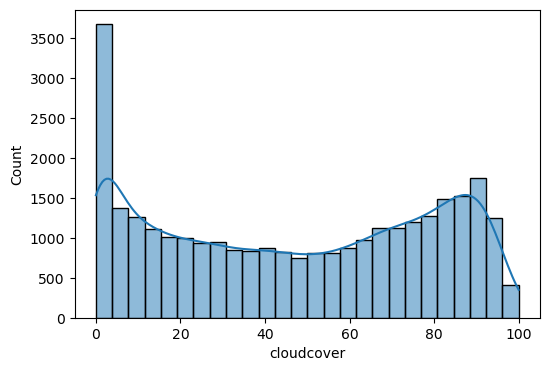

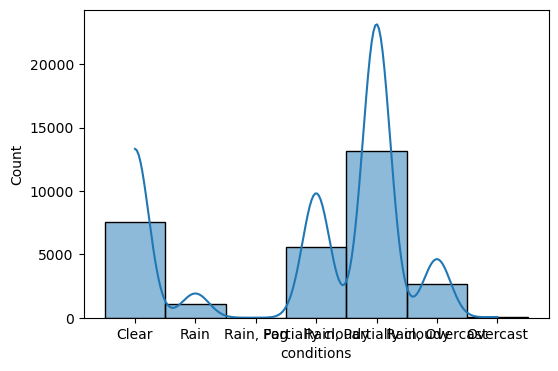

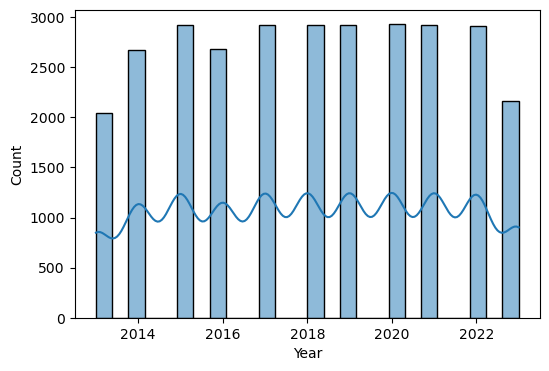

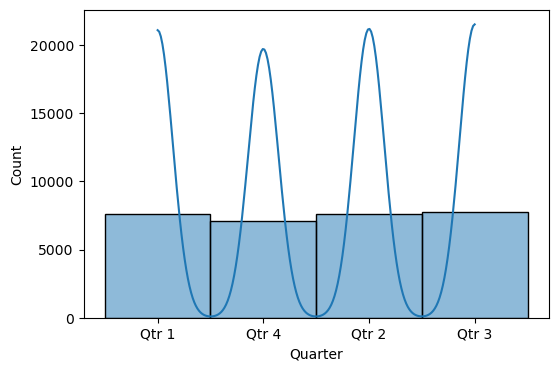

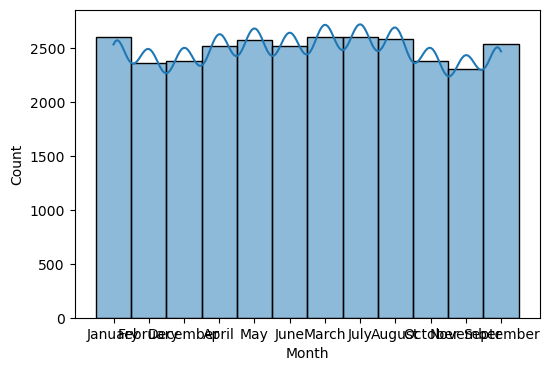

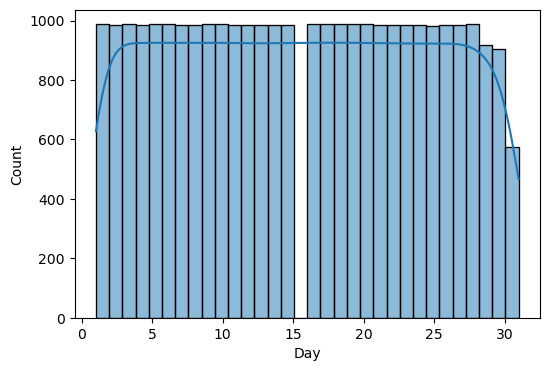

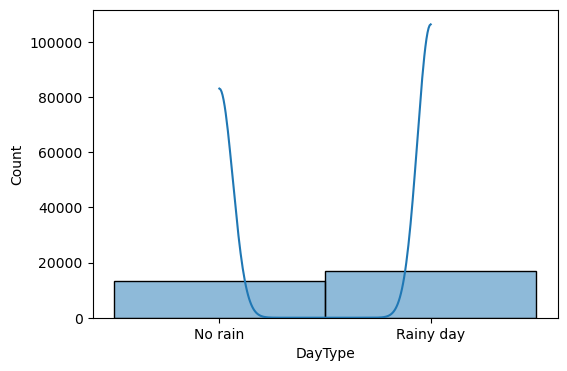

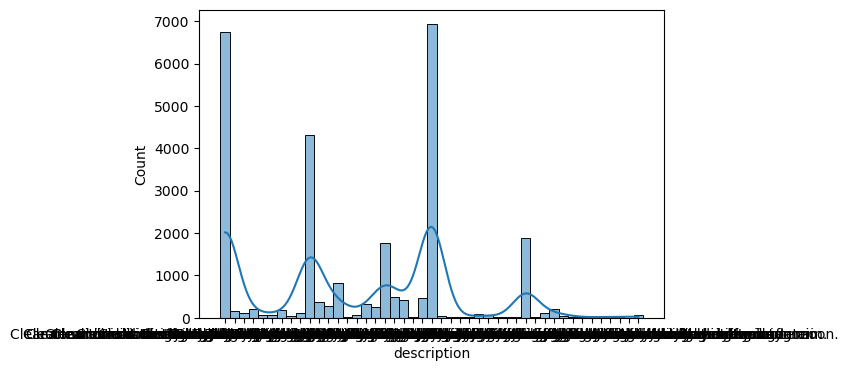

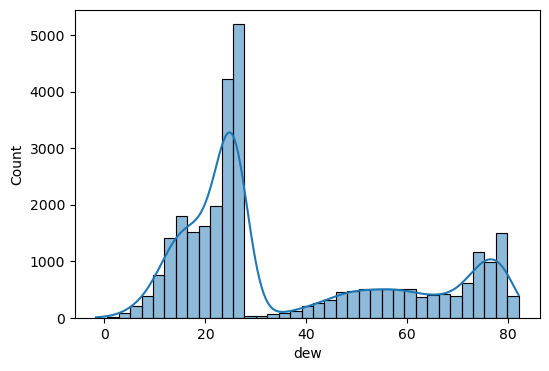

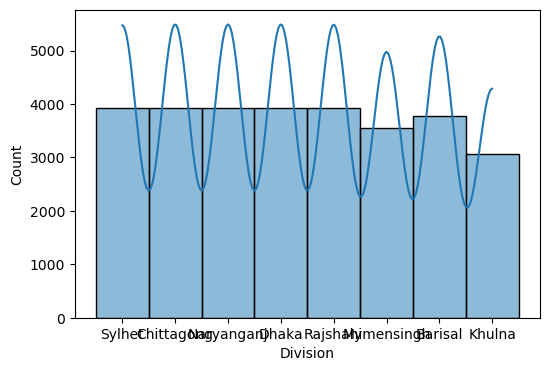

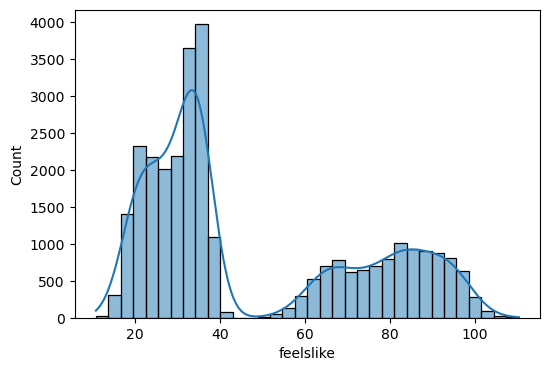

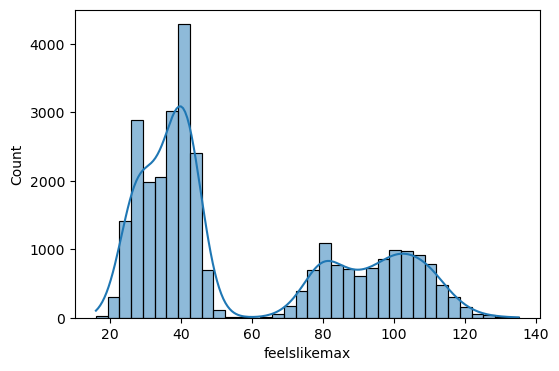

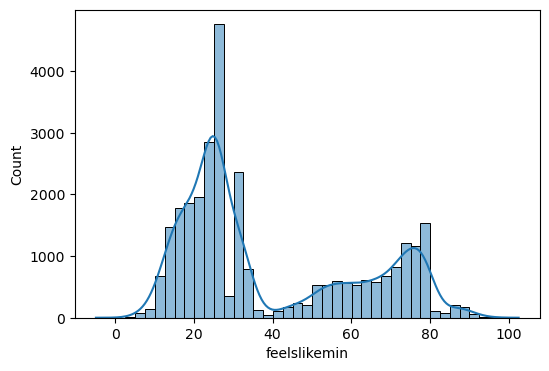

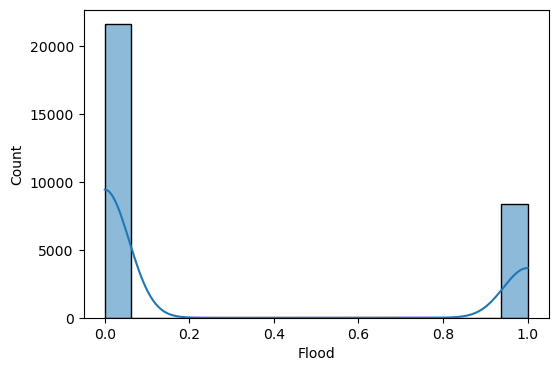

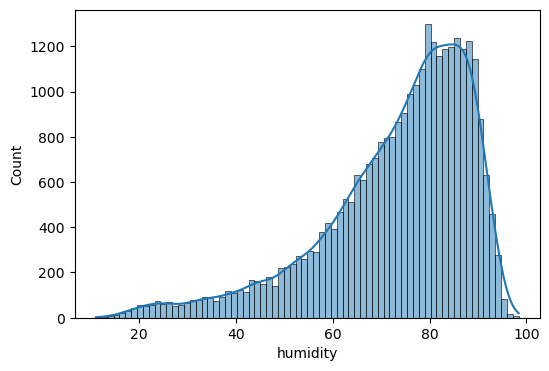

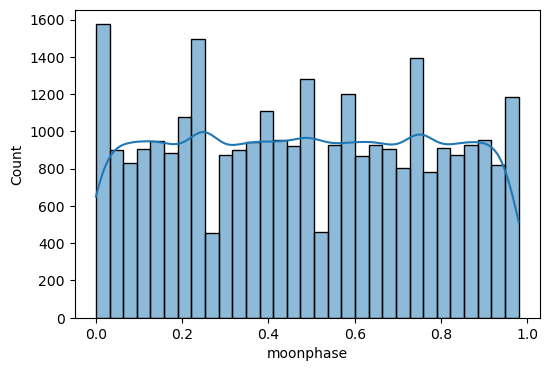

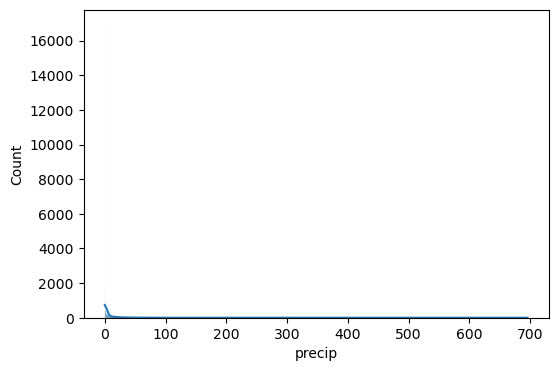

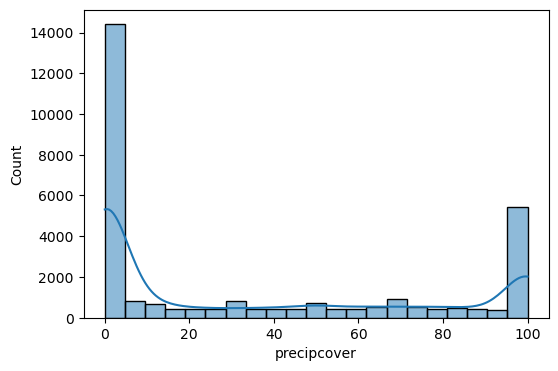

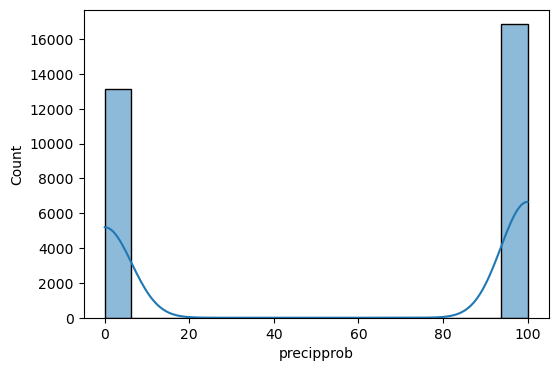

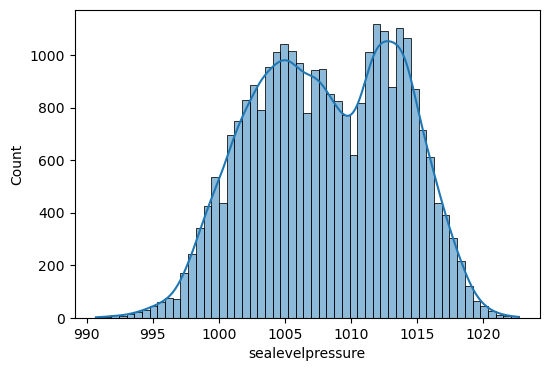

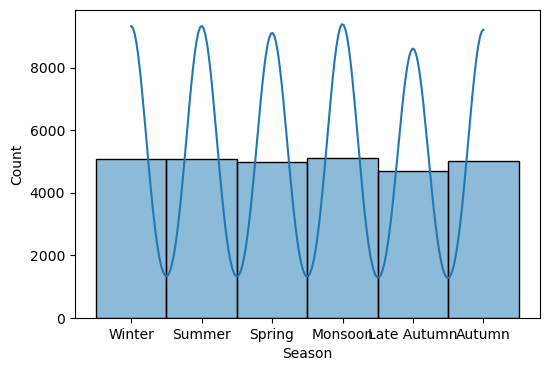

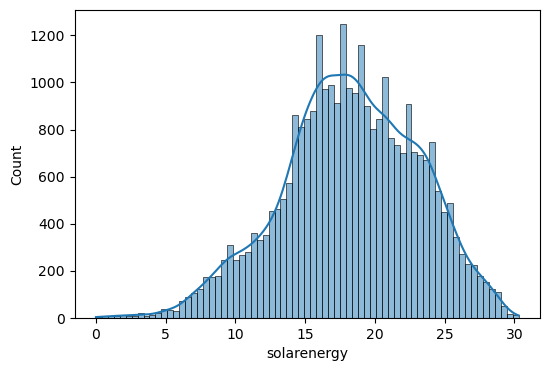

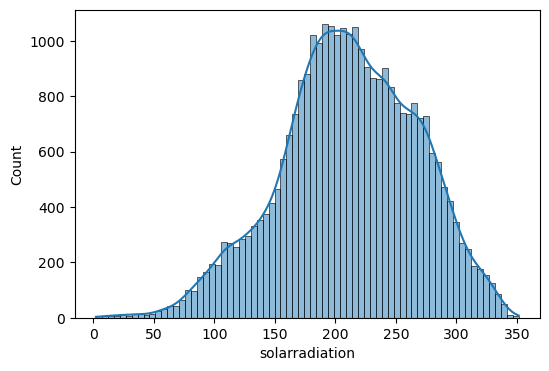

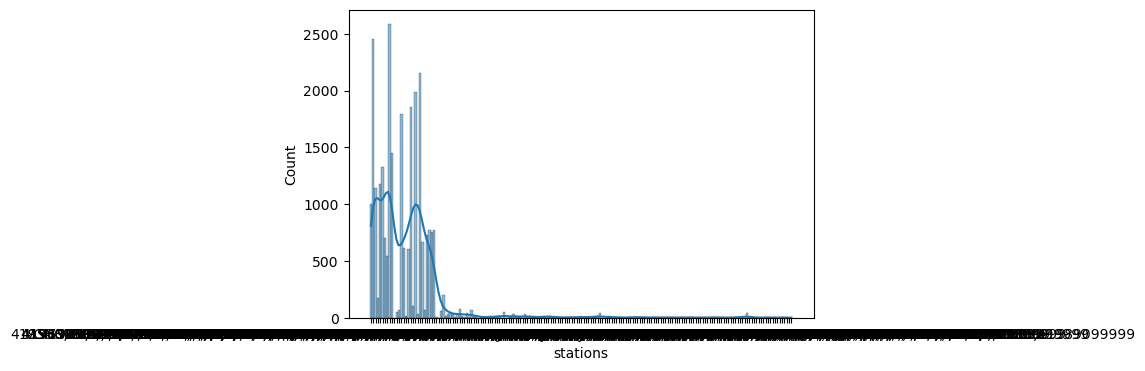

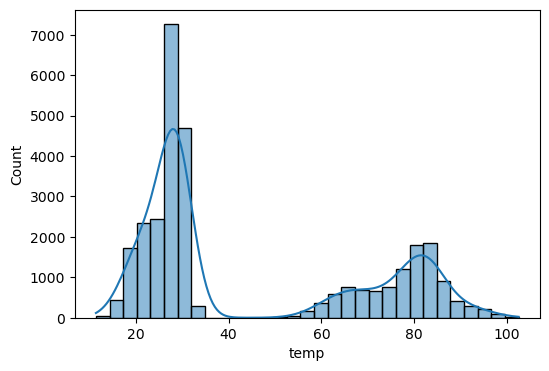

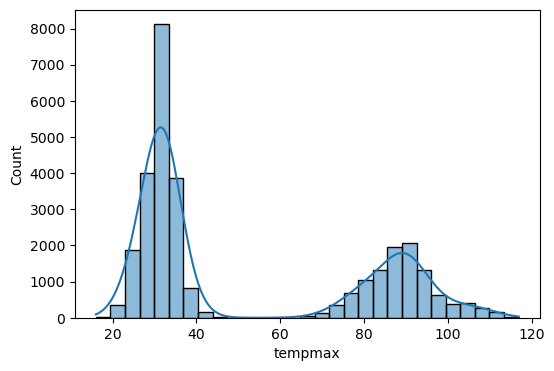

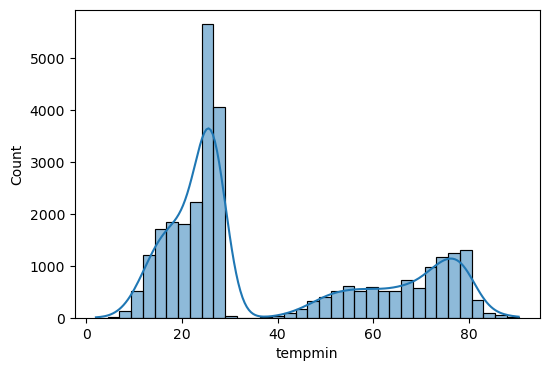

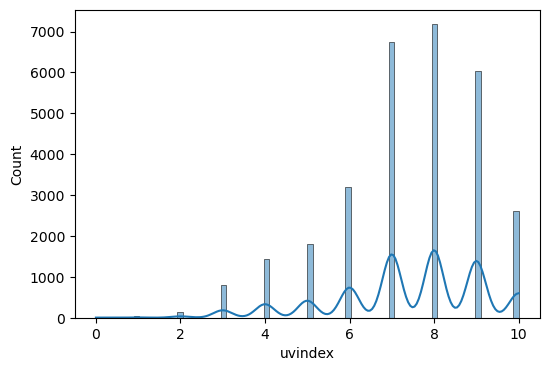

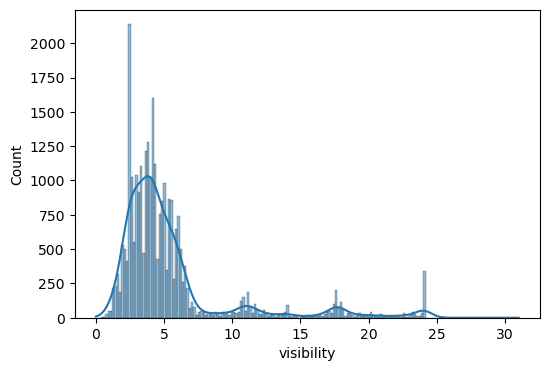

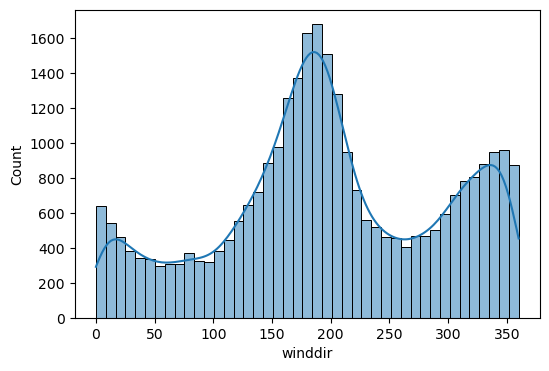

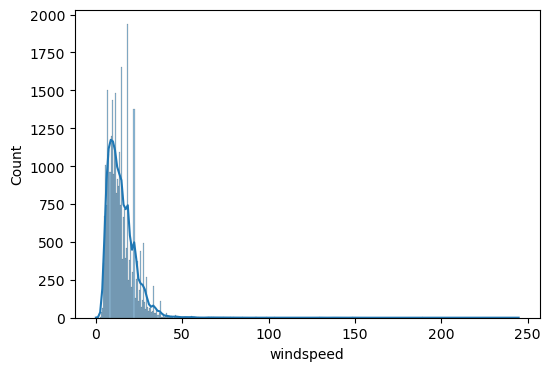

In [14]:
for i in df.columns:
    plt.figure(figsize = (6,4))
    sns.histplot(df[i], kde=True)
    plt.xlabel(i)
    plt.show()

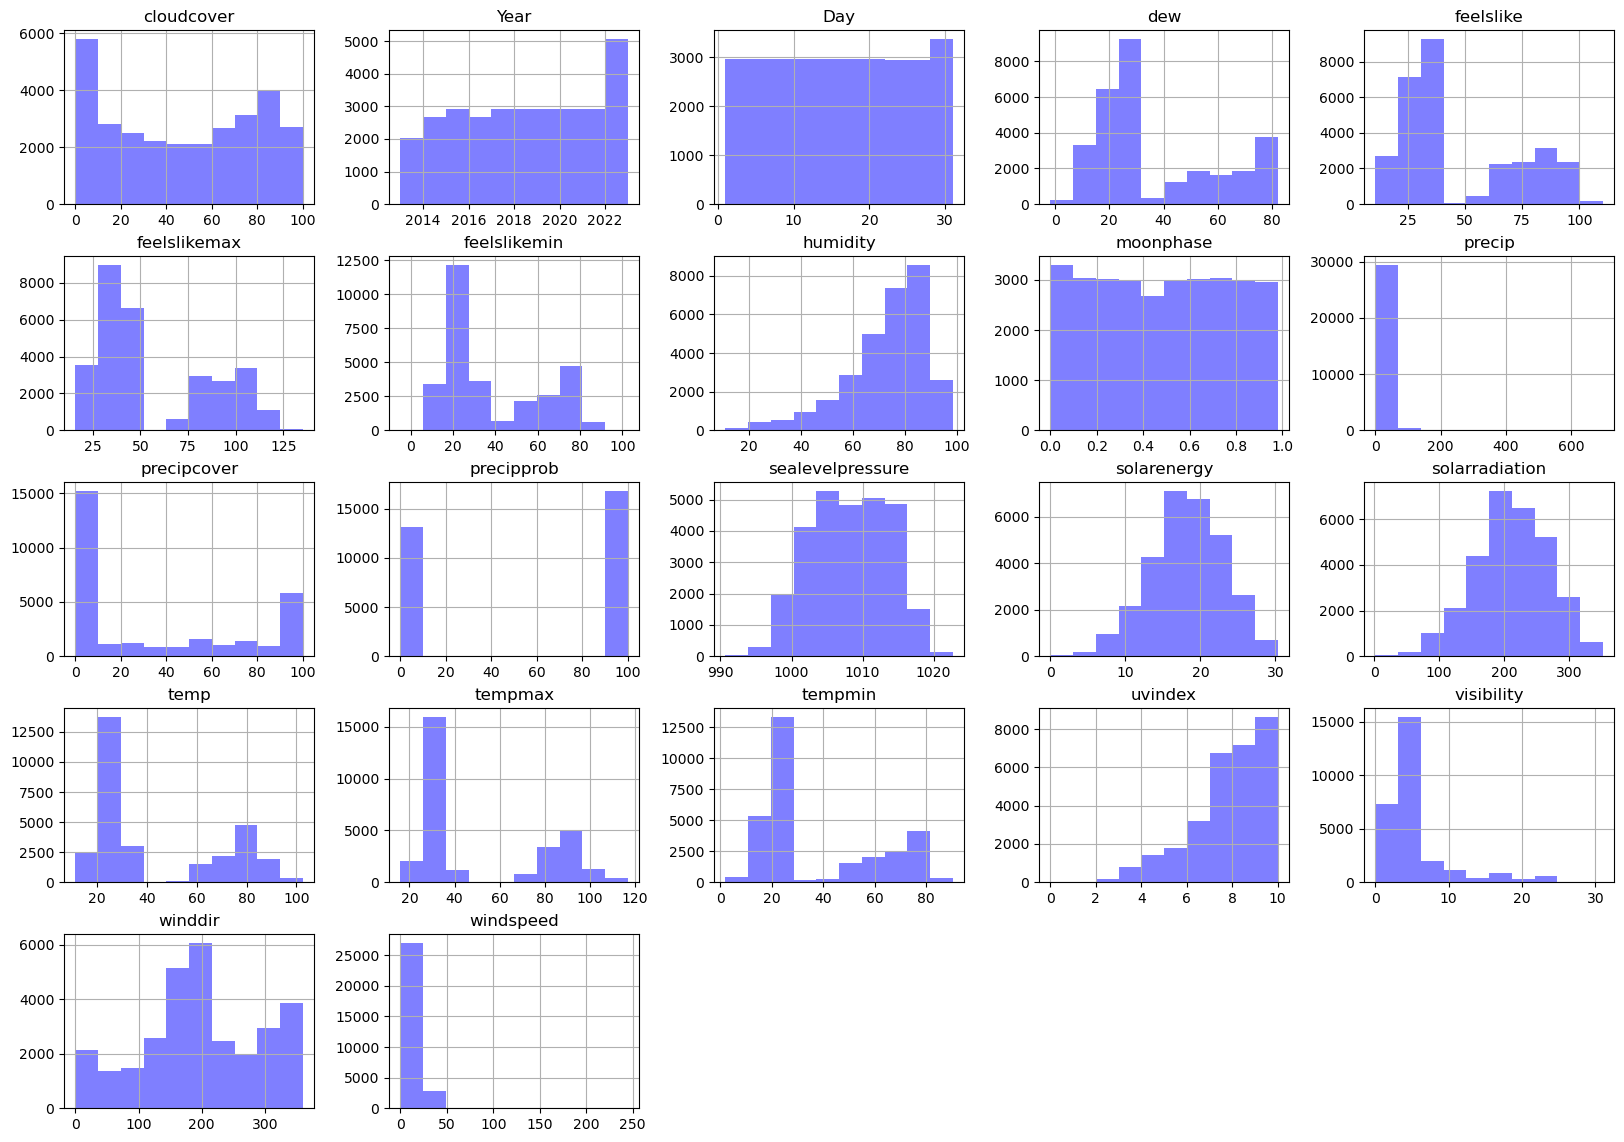

In [15]:
df.hist( color='b', figsize=(20,14), alpha=0.5)
plt.show()

# Correlation Analysis

In [16]:
# Finding correlation:

numeric_df = df.select_dtypes(include=[np.number])
df_corr = numeric_df.corr(method='pearson')
df_corr

,cloudcover,Year,Day,dew,feelslike,feelslikemax,feelslikemin,humidity,moonphase,precip,...,sealevelpressure,solarenergy,solarradiation,temp,tempmax,tempmin,uvindex,visibility,winddir,windspeed
cloudcover,1.000000,0.013168,0.000246,0.216645,0.132986,0.106617,0.165432,0.589316,0.000594,0.291231,...,-0.661436,-0.328125,-0.328844,0.052261,-0.025524,0.142556,-0.397873,0.014989,-0.206788,0.246029
Year,0.013168,1.000000,-0.001178,-0.002794,0.012597,0.013627,0.018545,-0.083402,-0.003661,-0.013021,...,0.000531,0.108248,0.108680,0.012756,0.010488,0.014714,0.157986,0.476610,-0.062209,0.035917
Day,0.000246,-0.001178,1.000000,0.000870,-0.002091,-0.001448,-0.002981,0.007667,0.000595,0.001791,...,0.003580,0.005739,0.005248,-0.001402,-0.001616,-0.001168,0.007126,0.003311,-0.013494,0.001952
dew,0.216645,-0.002794,0.000870,1.000000,0.963330,0.958669,0.962407,0.126836,-0.002774,-0.136811,...,-0.230382,0.024140,0.023458,0.946987,0.918297,0.965033,-0.014036,-0.277027,-0.169574,-0.356747
feelslike,0.132986,0.012597,-0.002091,0.963330,1.000000,0.995754,0.992884,-0.102299,-0.000007,-0.162324,...,-0.226513,0.149844,0.149414,0.991631,0.975765,0.994000,0.101697,-0.240467,-0.147317,-0.352854
feelslikemax,0.106617,0.013627,-0.001448,0.958669,0.995754,1.000000,0.983932,-0.112324,0.000651,-0.173693,...,-0.202400,0.155939,0.155498,0.989565,0.979425,0.987255,0.112005,-0.236669,-0.145493,-0.367926
feelslikemin,0.165432,0.018545,-0.002981,0.962407,0.992884,0.983932,1.000000,-0.079245,-0.001709,-0.149832,...,-0.246136,0.124818,0.124365,0.984602,0.963092,0.997249,0.077063,-0.238638,-0.147089,-0.331737
humidity,0.589316,-0.083402,0.007667,0.126836,-0.102299,-0.112324,-0.079245,1.000000,-0.010274,0.253924,...,-0.366463,-0.456423,-0.457408,-0.179493,-0.251916,-0.091548,-0.493625,-0.129280,-0.143610,0.132669
moonphase,0.000594,-0.003661,0.000595,-0.002774,-0.000007,0.000651,-0.001709,-0.010274,1.000000,-0.008476,...,0.018386,0.000564,0.000132,-0.000323,0.000537,-0.001629,-0.003746,-0.003813,0.001941,-0.005806
precip,0.291231,-0.013021,0.001791,-0.136811,-0.162324,-0.173693,-0.149832,0.253924,-0.008476,1.000000,...,-0.250201,-0.204159,-0.204142,-0.185783,-0.209840,-0.157280,-0.248549,-0.014423,-0.076232,0.307546


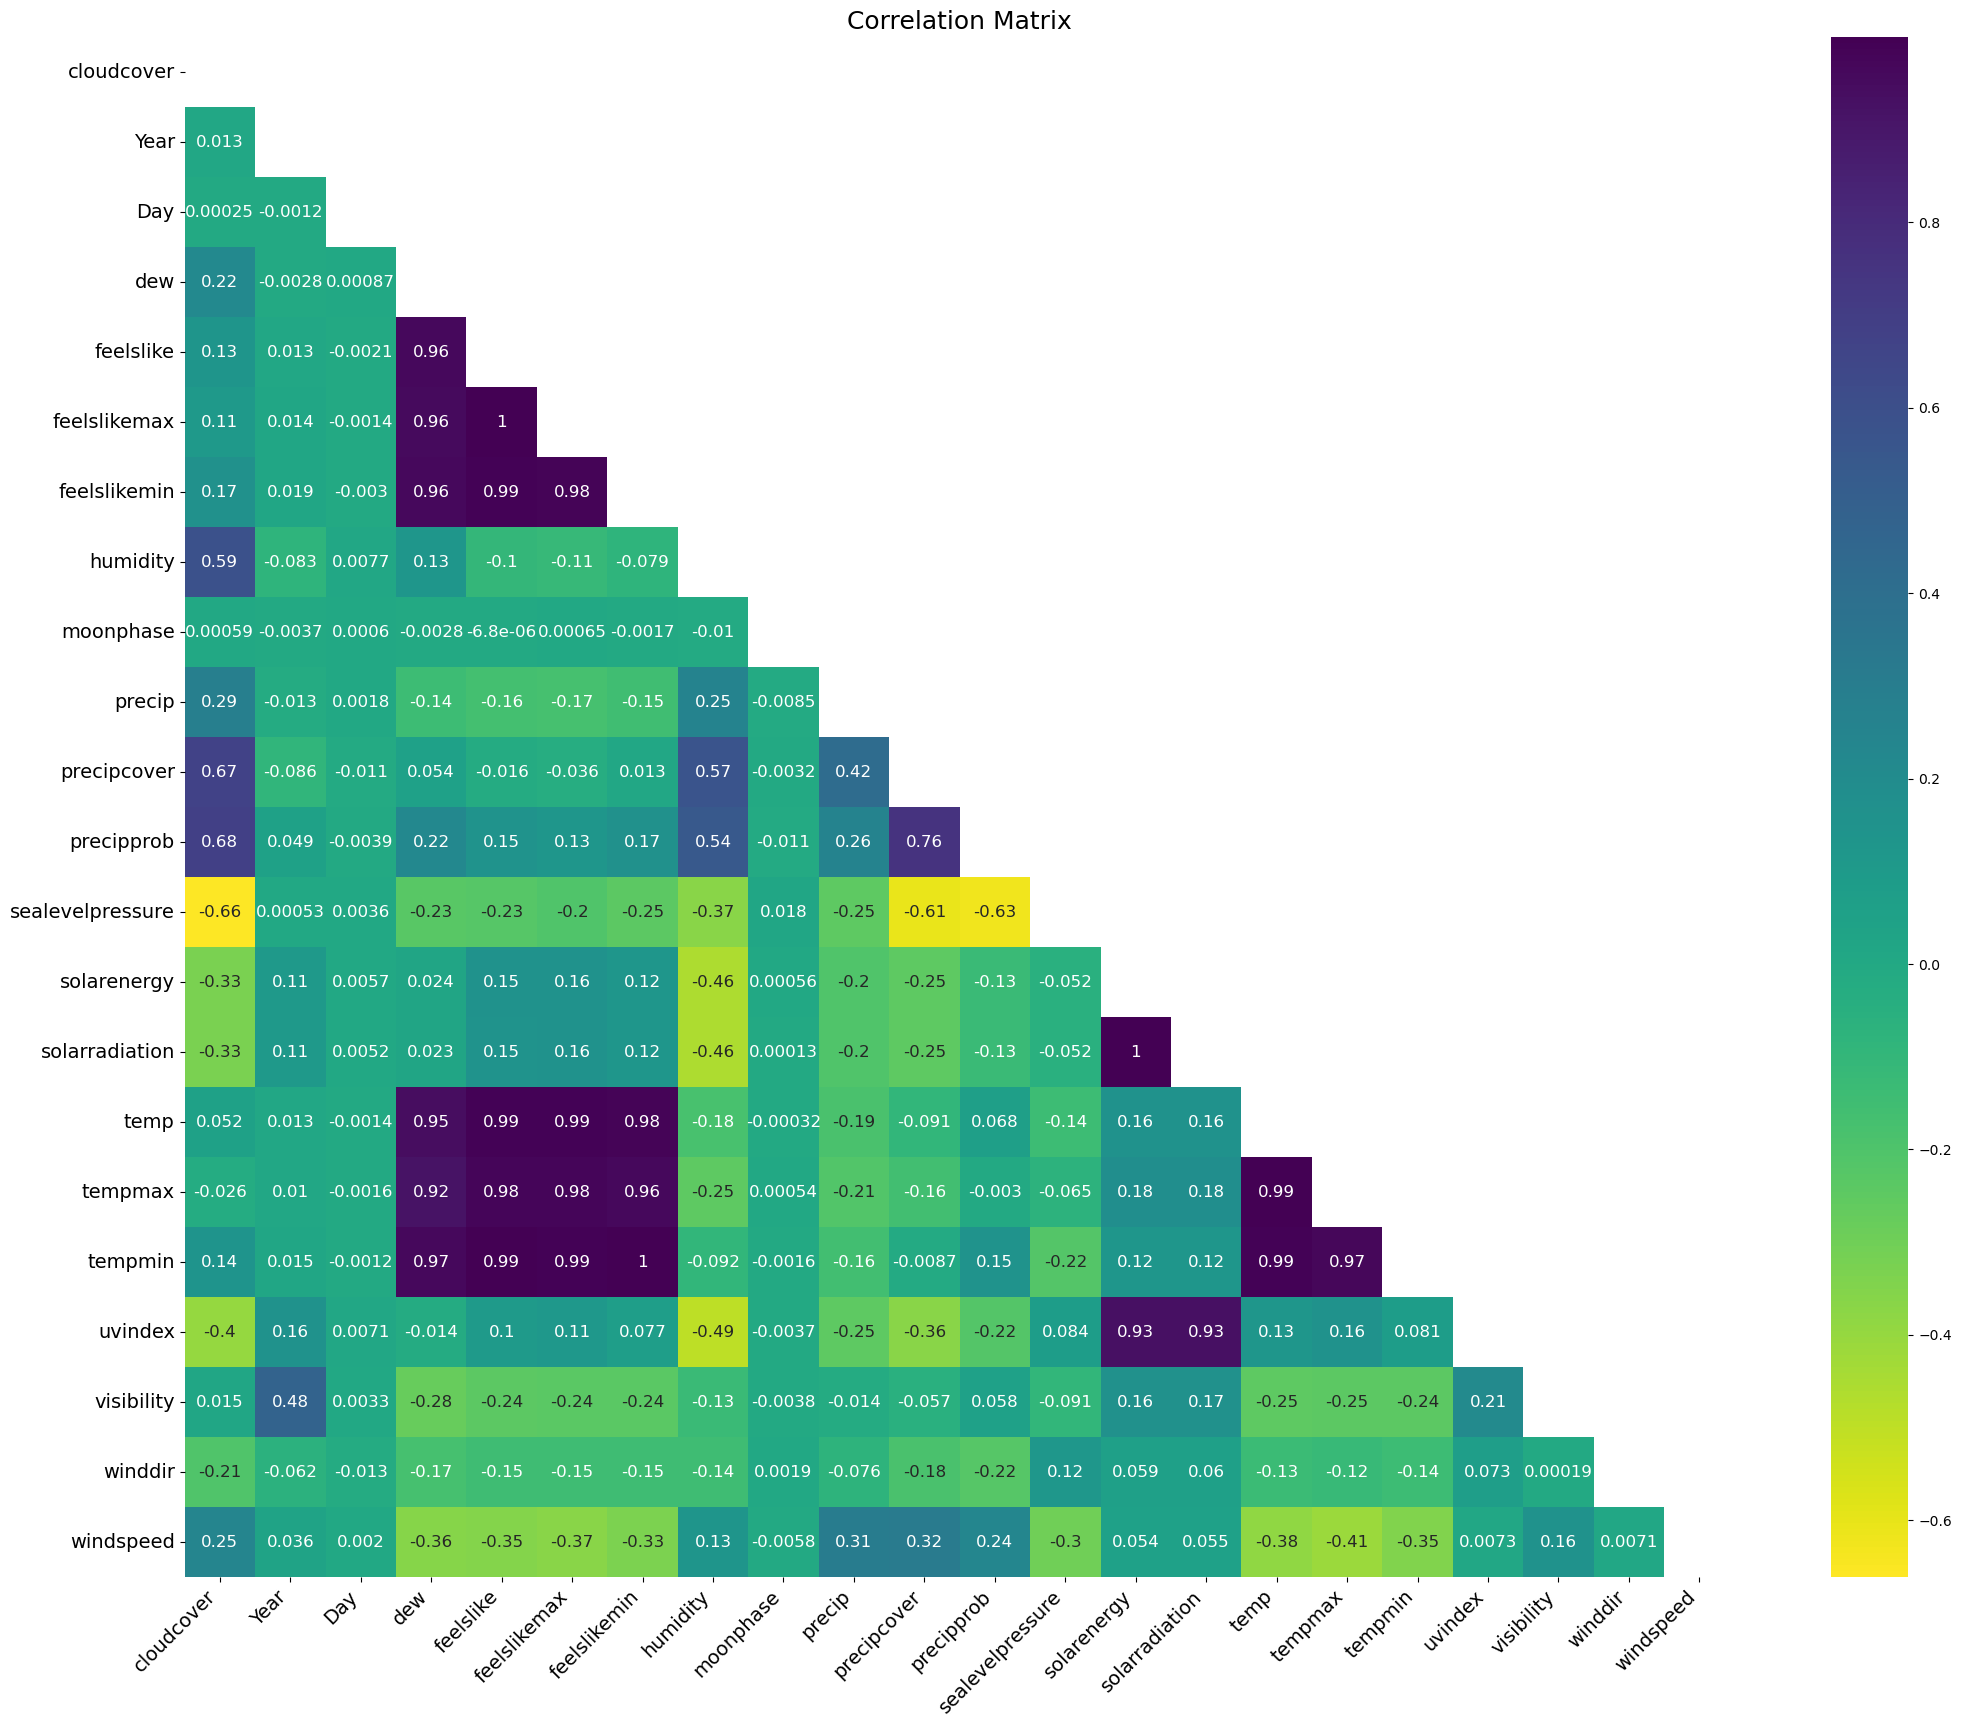

In [17]:
corr_matrix = numeric_df.corr()
plt.figure(figsize=(25, 20))
mask = np.triu(corr_matrix)
sns_plot = sns.heatmap(corr_matrix, annot=True, cmap='viridis_r', annot_kws={"size": 12}, mask=mask)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), rotation=0, verticalalignment='center', fontsize=14)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

# Insight into "Flood" and Numerical Predictor Variables

In [18]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_columns)

['cloudcover', 'Year', 'Day', 'dew', 'feelslike', 'feelslikemax', 'feelslikemin', 'humidity', 'moonphase', 'precip', 'precipcover', 'precipprob', 'sealevelpressure', 'solarenergy', 'solarradiation', 'temp', 'tempmax', 'tempmin', 'uvindex', 'visibility', 'winddir', 'windspeed']


In [19]:
# Studied Numerical Predictor Variables: (Excuding temprature)

x = ['cloudcover', 'dew', 'humidity', 'moonphase', "precip",'precipcover', 'sealevelpressure',
                    'solarenergy', 'solarradiation', 'uvindex', 'visibility', 'winddir', 'windspeed']

**KDE Plot - Weather Features (Numerical) with respect to "Flood"**

<Figure size 2000x1600 with 0 Axes>

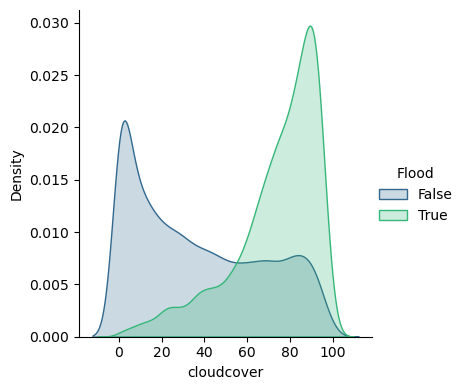

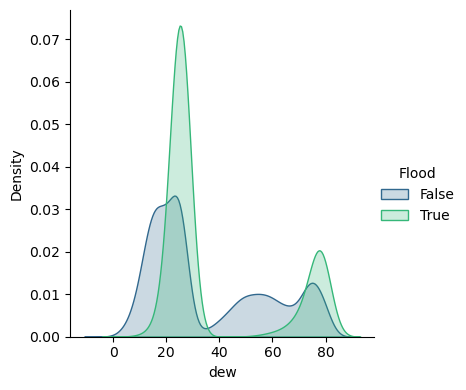

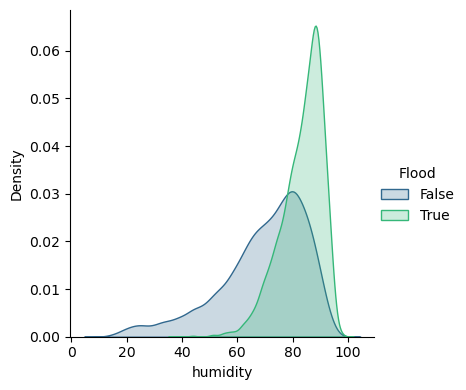

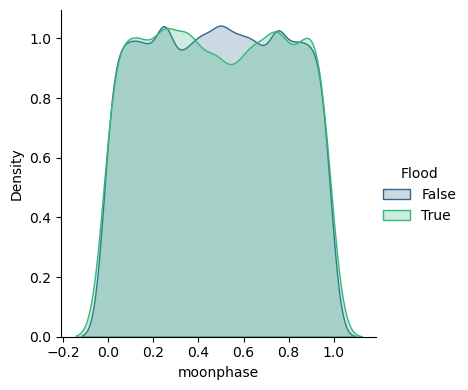

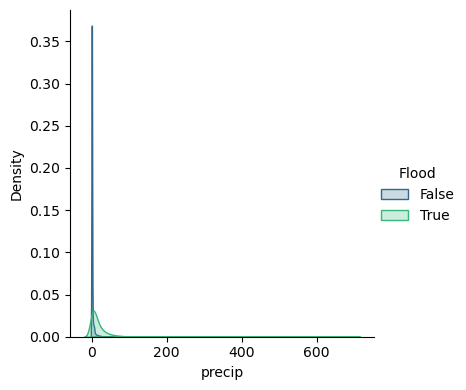

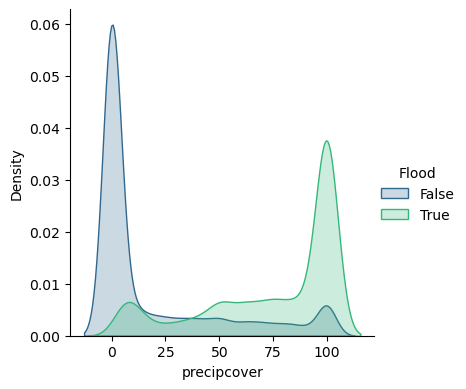

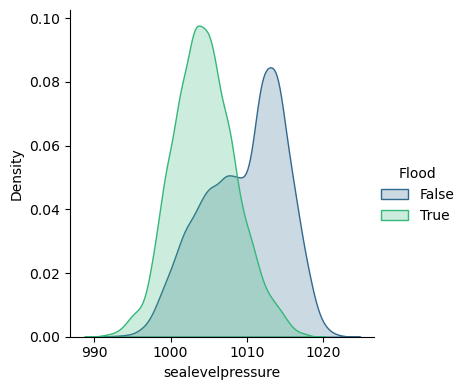

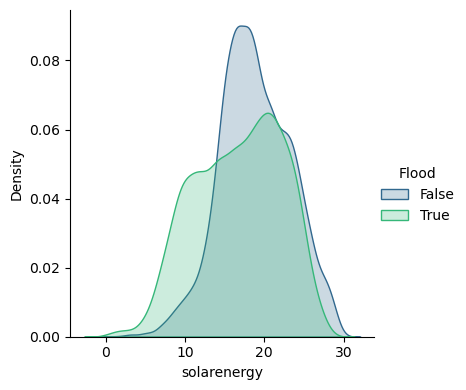

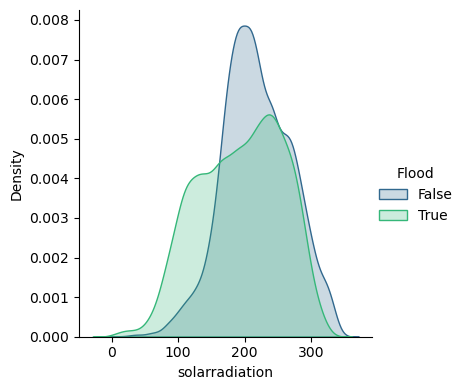

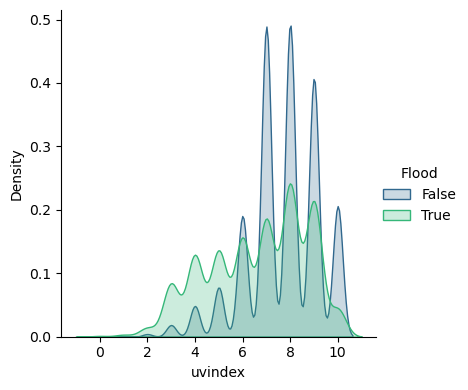

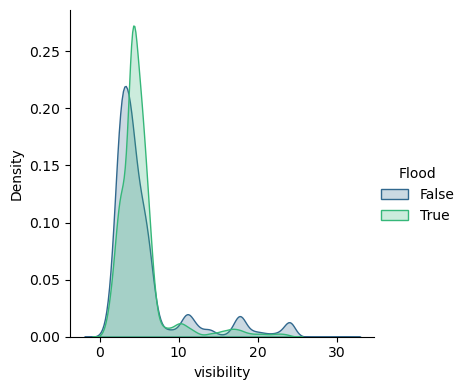

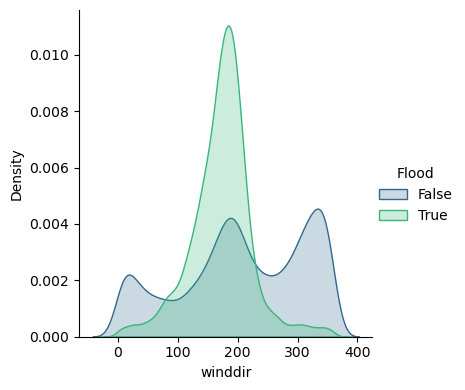

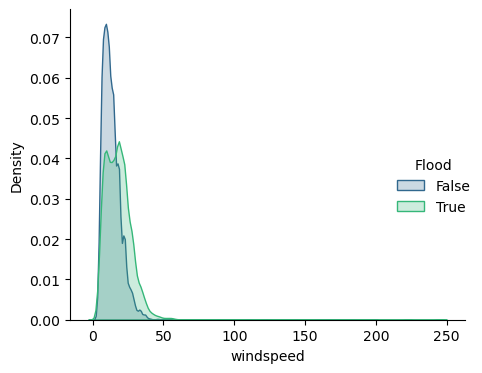

In [20]:
# KDE Plots of Weather Features (Numerical) with respect to "Flood" - Excuding temprature

x = ['cloudcover', 'dew', 'humidity', 'moonphase', "precip",'precipcover', 'sealevelpressure',
                    'solarenergy', 'solarradiation', 'uvindex', 'visibility', 'winddir', 'windspeed']


fig, axes = plt.subplots(nrows=13, ncols=1, figsize=(20, 16))
fig.suptitle('KDE Plots of Weather Features with Flood', fontsize=16)

# Flatten the axes array
axes = axes.flatten()

for i, column in enumerate(x):
    g = sns.FacetGrid(df, hue='Flood', palette='viridis', height=4, legend_out=True)
    g.map(sns.kdeplot, column, common_norm=False, fill=True)
    g.add_legend(title='Flood', labels=['False', 'True'])
    axes[i].remove()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Box Plot - Weather Features (Numerical) with respect to "Flood"**

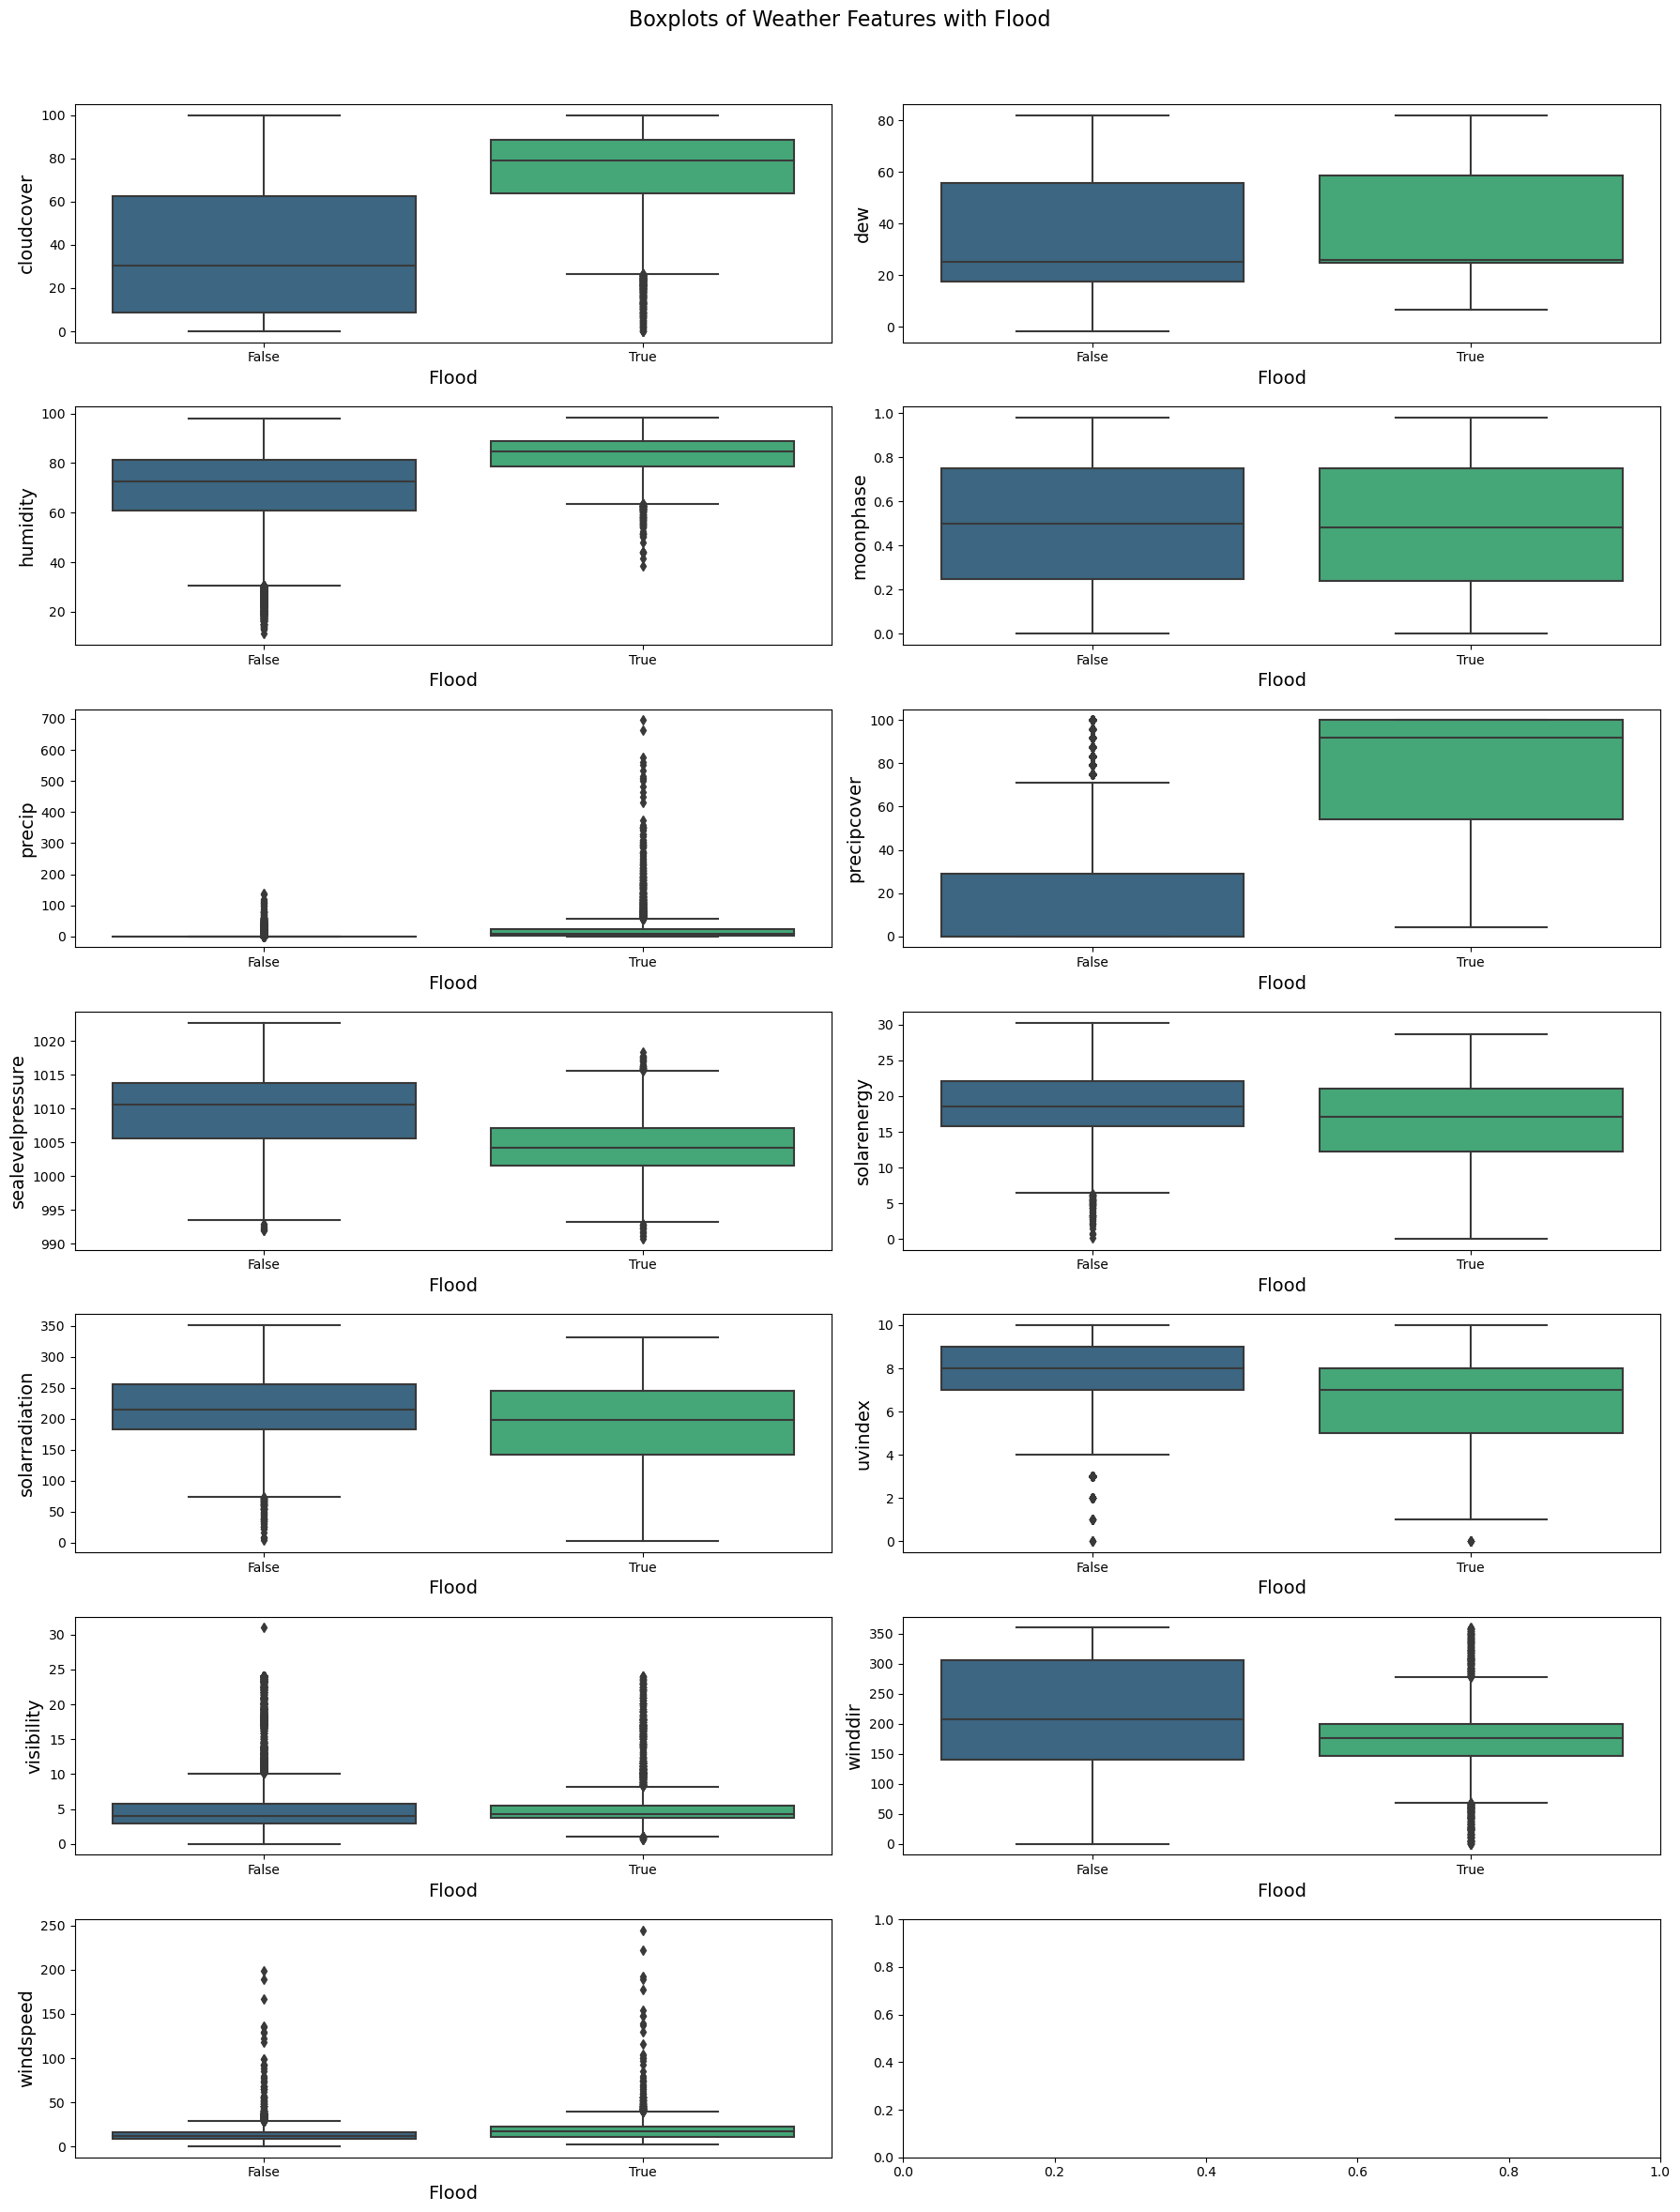

In [21]:
# Box Plots Weather Features (Numerical) with respect to "Flood" - Excuding temprature

x = ['cloudcover', 'dew', 'humidity', 'moonphase', "precip", 'precipcover', 'sealevelpressure',
                    'solarenergy', 'solarradiation', 'uvindex', 'visibility', 'winddir', 'windspeed']

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18,24))
fig.suptitle('Boxplots of Weather Features with Flood', fontsize=16)

# Flatten the axes array
axes = axes.flatten()

for i, column in enumerate(x):
    sns.boxplot(x='Flood', y=column, data=df, palette='viridis', ax=axes[i])
    axes[i].set_xlabel('Flood', fontsize=14)
    axes[i].set_ylabel(column, fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Bar Plot - Weather Features (Numerical) with respect to "Flood"**

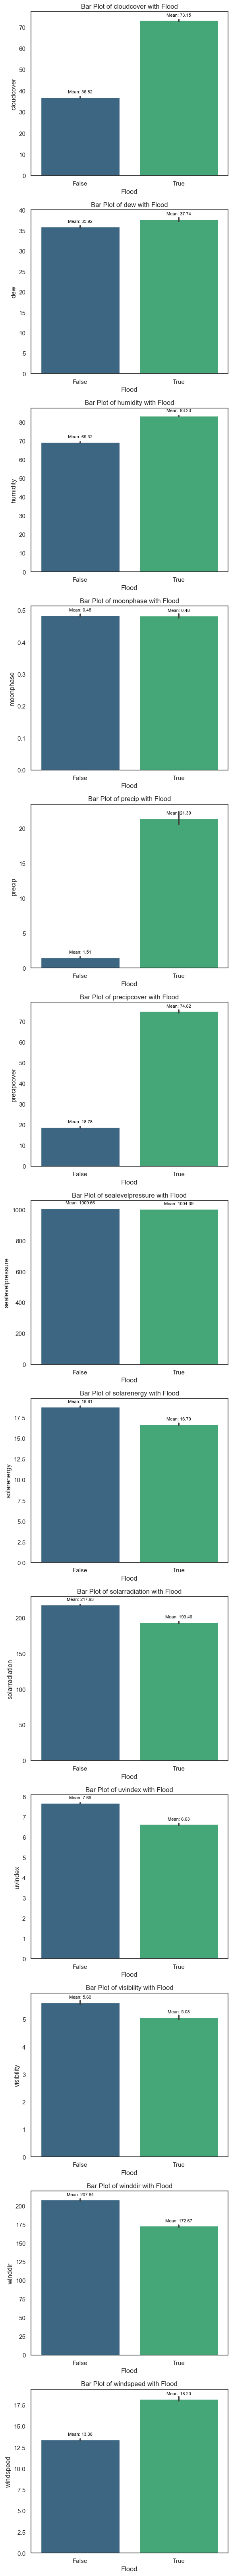

In [22]:
# Bar Plots of Weather Features (Numerical) with respect to "Flood" - Excuding temprature

sns.set(style="white")
x = ['cloudcover', 'dew', 'humidity', 'moonphase', "precip", 'precipcover', 'sealevelpressure',
                    'solarenergy', 'solarradiation', 'uvindex', 'visibility', 'winddir', 'windspeed']

# Set up subplots
fig, axes = plt.subplots(nrows=len(x), ncols=1, figsize=(6, 5 * len(x)))

for i, column in enumerate(x):
    ax = sns.barplot(x='Flood', y=column, data=df, palette='viridis', ax=axes[i])

    # Add mean annotations to each bar
    for p in ax.patches:
        ax.annotate(f'Mean: {p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', fontsize=8, color='black')

    ax.set_title(f'Bar Plot of {column} with Flood')

plt.tight_layout()
plt.show()


# Insight into "Flood" and  Categorical Predictor Variables

In [23]:
df.columns

Index(['cloudcover', 'conditions', 'Year', 'Quarter', 'Month', 'Day',
       'DayType', 'description', 'dew', 'Division', 'feelslike',
       'feelslikemax', 'feelslikemin', 'Flood', 'humidity', 'moonphase',
       'precip', 'precipcover', 'precipprob', 'sealevelpressure', 'Season',
       'solarenergy', 'solarradiation', 'stations', 'temp', 'tempmax',
       'tempmin', 'uvindex', 'visibility', 'winddir', 'windspeed'],
      dtype='object')

In [24]:
# Studied Categorical Predictor Variables:

x="conditions", "Year", "Quarter", 'Month', 'DayType', 'Division', 'precipprob', 'preciptype','Season'

**Count Plot - "Flood" and Categorical Predictor Variables**

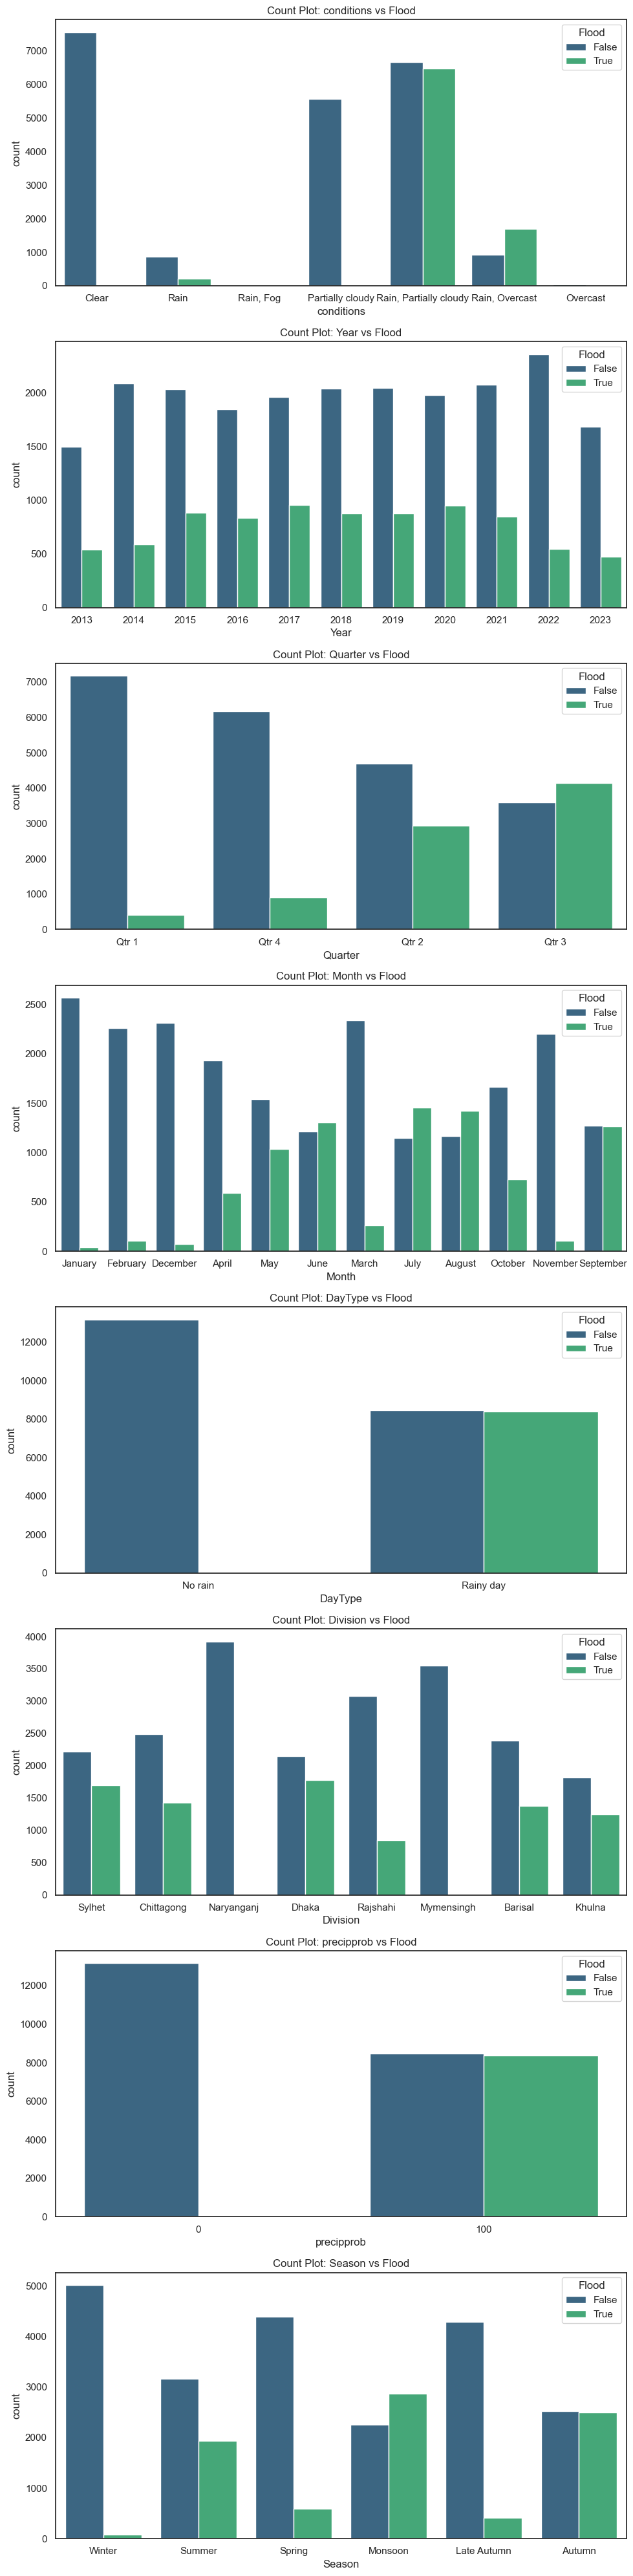

In [25]:
# Count Plot of "Flood" and Categorical Predictor Variables"

x = ["conditions", "Year", "Quarter", 'Month', 'DayType', 'Division','precipprob', 'Season']

fig, axes = plt.subplots(nrows=len(x), ncols=1, figsize=(10, 5 * len(x)))

# Loop through each column and create count plot
for i, column in enumerate(x):
    sns.countplot(x=column, hue='Flood', data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Count Plot: {column} vs Flood')


plt.tight_layout()
plt.show()

**Heatmap - "Flood" and Categorical Predictor Variables**

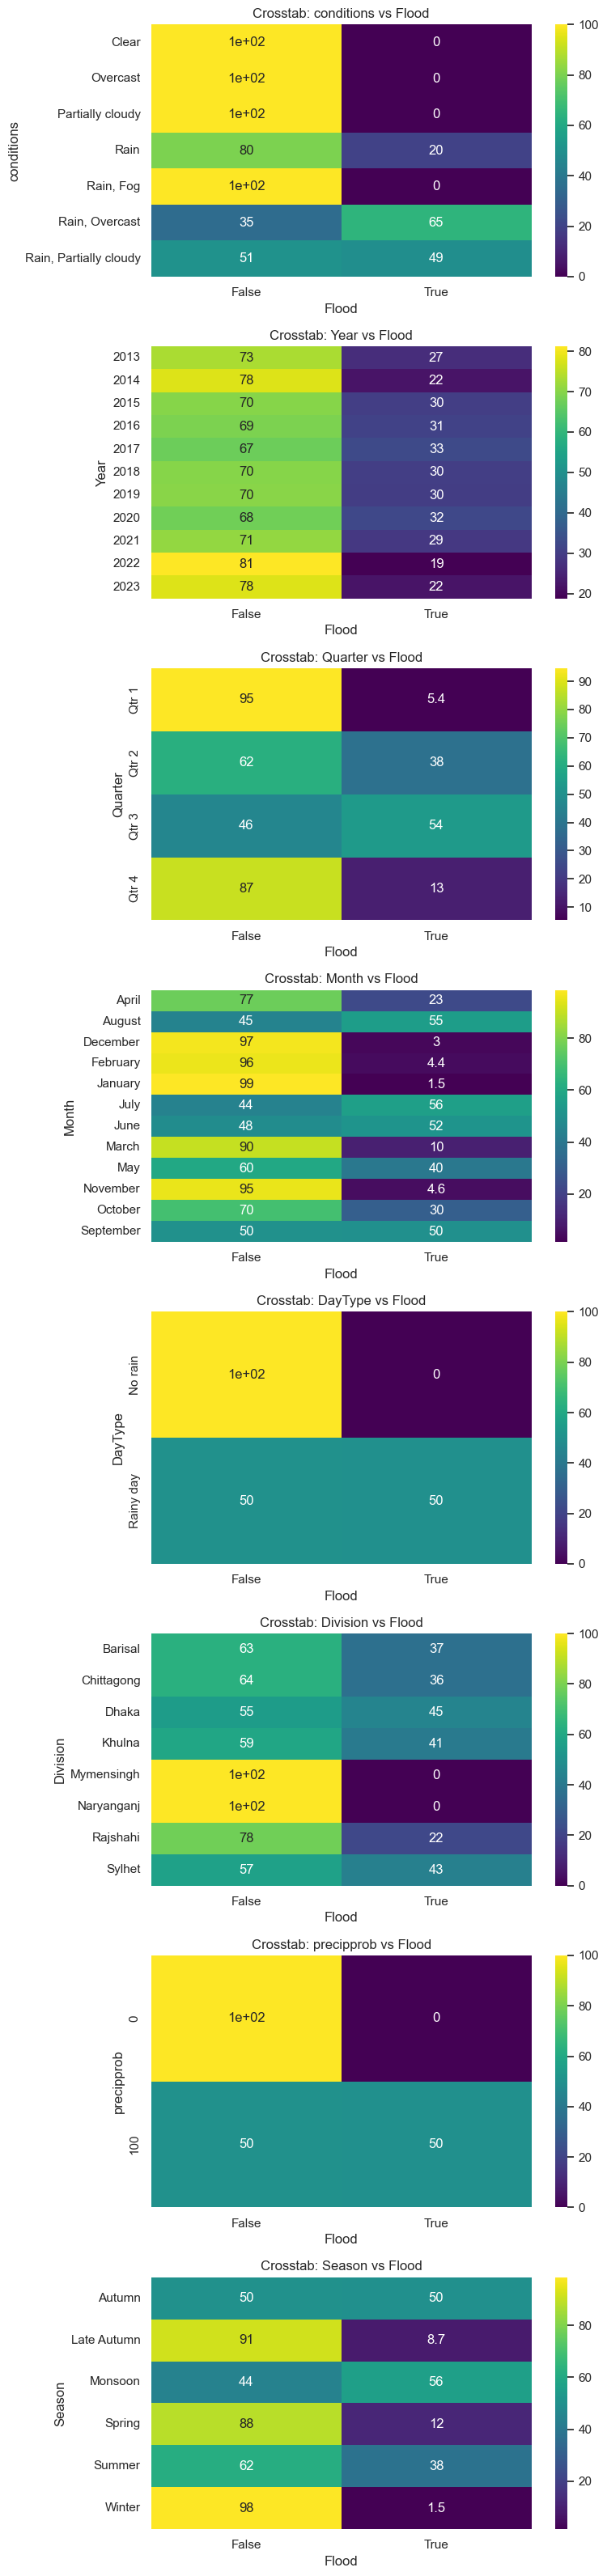

In [26]:
# Heatmap of "Flood" and Categorical Predictor Variables"

x = ["conditions", "Year", "Quarter", 'Month', 'DayType', 'Division', 'precipprob', 'Season']

# Set up subplots
fig, axes = plt.subplots(nrows=len(x), ncols=1, figsize=(8, 4 * len(x)))

# Loop through each column and create crosstab
for i, column in enumerate(x):
    crosstab = pd.crosstab(df[column], df['Flood'], normalize='index') * 100
    sns.heatmap(crosstab, annot=True, cmap='viridis', ax=axes[i])
    axes[i].set_title(f'Crosstab: {column} vs Flood')


plt.tight_layout()
plt.show()

**Chi-square Test - "Flood" and  Categorical Predictor Variables** 

In [27]:
# Perform the chi-square test between "Flood" and  categorical predictor variable:

from scipy.stats import chi2_contingency

x = ["conditions", "Year", "Quarter", 'Month', 'DayType', 'Division', 'precipprob','Season']
target_variable = 'Flood'

for column in x:
    contingency_table = pd.crosstab(df[column], df[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"\nChi-square test for {column} vs {target_variable}:")
    print(f"Chi-square value: {chi2}")
    print(f"P-value: {p}")
    
    # Check for significance
    if p < 0.05:
        print("There is a significant association.")
        print('*' * 40)
    else:
        print("There is no significant association.")
        print('*' * 40)



Chi-square test for conditions vs Flood:
Chi-square value: 9870.835596812314
P-value: 0.0
There is a significant association.
****************************************

Chi-square test for Year vs Flood:
Chi-square value: 305.31572094141393
P-value: 1.168564740031931e-59
There is a significant association.
****************************************

Chi-square test for Quarter vs Flood:
Chi-square value: 5676.041748850232
P-value: 0.0
There is a significant association.
****************************************

Chi-square test for Month vs Flood:
Chi-square value: 6820.354740723977
P-value: 0.0
There is a significant association.
****************************************

Chi-square test for DayType vs Flood:
Chi-square value: 9079.394841562404
P-value: 0.0
There is a significant association.
****************************************

Chi-square test for Division vs Flood:
Chi-square value: 4558.482702523231
P-value: 0.0
There is a significant association.
*********************************